# Notebook to prepare adult data for a unique file aggregating the sex and race attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from falsb4mpa.dataset.utils import bucket

In [2]:
column_names = ['age',
'workclass', 
'fnlwgt', 
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income']

In [3]:
used_columns = ['age',
'workclass',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',]
target = 'income'
sensitive = 'sex'

# Reading data

In [4]:
adult_train_data = pd.read_csv("../../data/raw/adult/adult.data", header=None, names=column_names)
adult_test_data = pd.read_csv("../../data/raw/adult/adult.test", header=None, names=column_names)

In [5]:
adult_train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
adult_train_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
adult_test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [8]:
adult_test_data.drop(labels=[0], axis=0, inplace=True)
adult_test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [9]:
adult_test_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [10]:
print(len(adult_train_data.index))
print(len(adult_test_data.index))

32561
16281


# Normalizing continuous data

In [11]:
continous_attr = ['capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()

In [12]:
for attr in continous_attr:
    adult_train_data[attr] = scaler.fit_transform(np.array(adult_train_data[attr]).reshape(-1,1))
    adult_test_data[attr] = scaler.fit_transform(np.array(adult_test_data[attr]).reshape(-1,1))

In [13]:
adult_train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.010777,0.020042,0.402423
std,13.640433,1.055500e+05,2.572720,0.073854,0.092507,0.125994
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.397959
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,0.397959
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,0.448980
max,90.000000,1.484705e+06,16.000000,1.000000,1.000000,1.000000


In [14]:
adult_test_data.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,0.010819,0.023315,0.401962
std,1.057149e+05,2.567545,0.075840,0.106924,0.127340
min,1.349200e+04,1.000000,0.000000,0.000000,0.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,0.397959
50%,1.778310e+05,10.000000,0.000000,0.000000,0.397959
75%,2.383840e+05,12.000000,0.000000,0.000000,0.448980
max,1.490400e+06,16.000000,1.000000,1.000000,1.000000


# Bucketing age

In [15]:
adult_train_data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [16]:
adult_train_data['age'].head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [17]:
buckets = [18, 25, 30, 35, 40 ,45, 50, 55, 60, 65, 90]
labels = ['age_ ' + str(bucket) for bucket in buckets]
dict_labels = {i:labels[i] for i in range(len(labels))}
dict_labels

{0: 'age_ 18',
 1: 'age_ 25',
 2: 'age_ 30',
 3: 'age_ 35',
 4: 'age_ 40',
 5: 'age_ 45',
 6: 'age_ 50',
 7: 'age_ 55',
 8: 'age_ 60',
 9: 'age_ 65',
 10: 'age_ 90'}

In [18]:
bucket_train = adult_train_data['age'].apply(bucket, buckets=buckets).to_frame()
bucket_test = adult_test_data['age'].apply(bucket, buckets=buckets).to_frame()

In [19]:
bucket_train = pd.get_dummies(bucket_train['age']).astype(int)
bucket_test = pd.get_dummies(bucket_test['age']).astype(int)
bucket_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [20]:
bucket_train = bucket_train.rename(columns=dict_labels)
bucket_test = bucket_test.rename(columns=dict_labels)
bucket_train.head()

,age_ 18,age_ 25,age_ 30,age_ 35,age_ 40,age_ 45,age_ 50,age_ 55,age_ 60,age_ 65,age_ 90
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
adult_train_data = pd.concat([adult_train_data, bucket_train], axis=1)
adult_test_data = pd.concat([adult_test_data, bucket_test], axis=1)

# Aggregating sex and race and dropping original columns

In [22]:
adult_train_data['sex-race'] = adult_train_data[['sex', 'race']].agg('-'.join, axis=1)
adult_test_data['sex-race'] = adult_test_data[['sex', 'race']].agg('-'.join, axis=1)

In [23]:
adult_train_data.drop(["sex", "race"], axis=1, inplace=True)
adult_test_data.drop(["sex", "race"], axis=1, inplace=True)

# Binarizing income

In [ ]:
adult_train_data['income'] = pd.get_dummies(adult_train_data['income']).astype(int)[' >50K']
adult_test_data['income'] = pd.get_dummies(adult_test_data['income']).astype(int)[' >50K.']

# One hot encoding categorical data

In [25]:
categorical_attr = ['workclass','education','marital-status','occupation','relationship','native-country', 'sex-race']

In [26]:
one_hot_train = adult_train_data.copy()
one_hot_test = adult_test_data.copy()

for attr in categorical_attr:
    column_idx = adult_train_data.columns.get_loc(attr)
    adult_train_data = pd.concat([adult_train_data, pd.get_dummies(adult_train_data[attr], prefix=attr, dtype=int)], axis=1)
    adult_test_data = pd.concat([adult_test_data, pd.get_dummies(adult_test_data[attr], prefix=attr, dtype=int)], axis=1)

In [27]:
adult_train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,sex-race_ Female- Amer-Indian-Eskimo,sex-race_ Female- Asian-Pac-Islander,sex-race_ Female- Black,sex-race_ Female- Other,sex-race_ Female- White,sex-race_ Male- Amer-Indian-Eskimo,sex-race_ Male- Asian-Pac-Islander,sex-race_ Male- Black,sex-race_ Male- Other,sex-race_ Male- White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0.021740,0.0,...,0,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
adult_test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,sex-race_ Female- Amer-Indian-Eskimo,sex-race_ Female- Asian-Pac-Islander,sex-race_ Female- Black,sex-race_ Female- Other,sex-race_ Female- White,sex-race_ Male- Amer-Indian-Eskimo,sex-race_ Male- Asian-Pac-Islander,sex-race_ Male- Black,sex-race_ Male- Other,sex-race_ Male- White
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,0.076881,0.0,...,0,0,0,0,0,0,0,1,0,0
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,0.054551,0.0,...,0,0,0,0,0,0,1,0,0,0


# Removing missing values

In [29]:
adult_test_data['workclass'].iloc[4] == (' ?')

True

In [30]:
column_names = ['age',
    'workclass', 
    'fnlwgt', 
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
    'sex-race'
]

In [31]:
for column in column_names:
    #print(column)
    #print(adult_train_data[column])
    adult_train_data = adult_train_data[adult_train_data[column] != ' ?']
    adult_test_data = adult_test_data[adult_test_data[column] != ' ?']

In [32]:
print(len(adult_train_data.index))
print(len(adult_test_data.index))

30162
15060


# Removing not used columns

In [33]:
attr_to_remove = ['age', 'fnlwgt'] + categorical_attr

In [34]:
for attr in adult_train_data.columns:
    if '_ ?' in attr:
        print(attr)
        adult_train_data = adult_train_data.drop(attr, axis='columns')
        adult_test_data = adult_test_data.drop(attr, axis='columns')

workclass_ ?
occupation_ ?
native-country_ ?


In [35]:
print(len(adult_test_data.index))

15060


In [36]:
for attr in attr_to_remove:
    adult_train_data = adult_train_data.drop(attr, axis='columns')
    adult_test_data = adult_test_data.drop(attr, axis='columns')

In [37]:
print(len(adult_test_data.index))

15060


In [38]:
print(len(adult_train_data.columns))
print(len(adult_test_data.columns))

118
117


In [39]:
#Test file doesn't have any example for this value of native-country -> get_dummies doesn't encode it
attr = 'native-country_ Holand-Netherlands'
rows = len(adult_test_data.index)
d = pd.DataFrame(0, index=np.arange(rows), columns=[attr])
d

,native-country_ Holand-Netherlands
0,0
1,0
2,0
3,0
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [40]:
adult_test_data

,education-num,capital-gain,capital-loss,hours-per-week,income,age_ 18,age_ 25,age_ 30,age_ 35,age_ 40,...,sex-race_ Female- Amer-Indian-Eskimo,sex-race_ Female- Asian-Pac-Islander,sex-race_ Female- Black,sex-race_ Female- Other,sex-race_ Female- White,sex-race_ Male- Amer-Indian-Eskimo,sex-race_ Male- Asian-Pac-Islander,sex-race_ Male- Black,sex-race_ Male- Other,sex-race_ Male- White
1,7.0,0.000000,0.0,0.397959,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.0,0.000000,0.0,0.500000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,12.0,0.000000,0.0,0.397959,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10.0,0.076881,0.0,0.397959,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,6.0,0.000000,0.0,0.295918,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,13.0,0.000000,0.0,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16277,13.0,0.000000,0.0,0.357143,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
16279,13.0,0.000000,0.0,0.500000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
16280,13.0,0.054551,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
adult_test_data.reset_index(drop=True, inplace=True)
d.reset_index(drop=True, inplace=True)
pd.concat([adult_test_data, d], axis=1)

,education-num,capital-gain,capital-loss,hours-per-week,income,age_ 18,age_ 25,age_ 30,age_ 35,age_ 40,...,sex-race_ Female- Asian-Pac-Islander,sex-race_ Female- Black,sex-race_ Female- Other,sex-race_ Female- White,sex-race_ Male- Amer-Indian-Eskimo,sex-race_ Male- Asian-Pac-Islander,sex-race_ Male- Black,sex-race_ Male- Other,sex-race_ Male- White,native-country_ Holand-Netherlands
0,7.0,0.000000,0.0,0.397959,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,9.0,0.000000,0.0,0.500000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,12.0,0.000000,0.0,0.397959,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10.0,0.076881,0.0,0.397959,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6.0,0.000000,0.0,0.295918,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,13.0,0.000000,0.0,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
15056,13.0,0.000000,0.0,0.357143,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
15057,13.0,0.000000,0.0,0.500000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15058,13.0,0.054551,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
adult_test_data = pd.concat([adult_test_data, d], axis=1)
print(len(adult_test_data.columns))

118


In [43]:
adult_train_data.columns.to_list()

['education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'age_ 18',
 'age_ 25',
 'age_ 30',
 'age_ 35',
 'age_ 40',
 'age_ 45',
 'age_ 50',
 'age_ 55',
 'age_ 60',
 'age_ 65',
 'age_ 90',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-stat

# Reordering the columns

In [44]:
#sem education-num
columns_order = [
    'age_ 18','age_ 25','age_ 30','age_ 35','age_ 40','age_ 45','age_ 50','age_ 55','age_ 60','age_ 65','age_ 90',
    'education_ 10th','education_ 11th','education_ 12th','education_ 1st-4th','education_ 5th-6th','education_ 7th-8th','education_ 9th','education_ Assoc-acdm','education_ Assoc-voc','education_ Bachelors','education_ Doctorate','education_ HS-grad','education_ Masters','education_ Preschool','education_ Prof-school','education_ Some-college',
    'workclass_ Federal-gov','workclass_ Local-gov','workclass_ Never-worked','workclass_ Private','workclass_ Self-emp-inc','workclass_ Self-emp-not-inc','workclass_ State-gov','workclass_ Without-pay',
    'marital-status_ Divorced','marital-status_ Married-AF-spouse','marital-status_ Married-civ-spouse','marital-status_ Married-spouse-absent','marital-status_ Never-married','marital-status_ Separated','marital-status_ Widowed',
    'occupation_ Adm-clerical','occupation_ Armed-Forces','occupation_ Craft-repair','occupation_ Exec-managerial','occupation_ Farming-fishing','occupation_ Handlers-cleaners','occupation_ Machine-op-inspct','occupation_ Other-service','occupation_ Priv-house-serv','occupation_ Prof-specialty','occupation_ Protective-serv','occupation_ Sales','occupation_ Tech-support','occupation_ Transport-moving',
    'relationship_ Husband','relationship_ Not-in-family','relationship_ Other-relative','relationship_ Own-child','relationship_ Unmarried','relationship_ Wife',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country_ Cambodia','native-country_ Canada','native-country_ China','native-country_ Columbia','native-country_ Cuba','native-country_ Dominican-Republic','native-country_ Ecuador','native-country_ El-Salvador','native-country_ England','native-country_ France','native-country_ Germany','native-country_ Greece','native-country_ Guatemala','native-country_ Haiti','native-country_ Holand-Netherlands','native-country_ Honduras','native-country_ Hong','native-country_ Hungary','native-country_ India','native-country_ Iran','native-country_ Ireland','native-country_ Italy','native-country_ Jamaica','native-country_ Japan','native-country_ Laos','native-country_ Mexico','native-country_ Nicaragua','native-country_ Outlying-US(Guam-USVI-etc)','native-country_ Peru','native-country_ Philippines','native-country_ Poland','native-country_ Portugal','native-country_ Puerto-Rico','native-country_ Scotland','native-country_ South','native-country_ Taiwan','native-country_ Thailand','native-country_ Trinadad&Tobago','native-country_ United-States','native-country_ Vietnam','native-country_ Yugoslavia',
    'sex-race_ Female- Amer-Indian-Eskimo', 'sex-race_ Female- Asian-Pac-Islander','sex-race_ Female- Black','sex-race_ Female- Other','sex-race_ Female- White','sex-race_ Male- Amer-Indian-Eskimo','sex-race_ Male- Asian-Pac-Islander','sex-race_ Male- Black','sex-race_ Male- Other','sex-race_ Male- White',
    'income'
]

In [45]:
adult_train_data

,education-num,capital-gain,capital-loss,hours-per-week,income,age_ 18,age_ 25,age_ 30,age_ 35,age_ 40,...,sex-race_ Female- Amer-Indian-Eskimo,sex-race_ Female- Asian-Pac-Islander,sex-race_ Female- Black,sex-race_ Female- Other,sex-race_ Female- White,sex-race_ Male- Amer-Indian-Eskimo,sex-race_ Male- Asian-Pac-Islander,sex-race_ Male- Black,sex-race_ Male- Other,sex-race_ Male- White
0,13,0.021740,0.0,0.397959,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,13,0.000000,0.0,0.122449,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,0.000000,0.0,0.397959,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,7,0.000000,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0.000000,0.0,0.377551,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
32557,9,0.000000,0.0,0.397959,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
32558,9,0.000000,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32559,9,0.000000,0.0,0.193878,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
adult_train_data = adult_train_data[columns_order]
adult_test_data = adult_test_data[columns_order]

# Saving data

In [47]:
data = pd.concat([adult_train_data, adult_test_data])

In [48]:
len(data.index)

45222

In [49]:
data.to_csv("../../data/processed/adult/adult_mpa.csv")

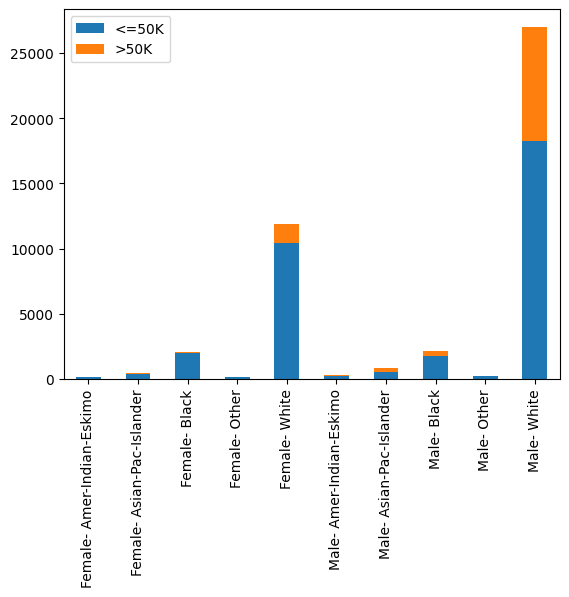

In [50]:
cols = ['sex-race_ Female- Amer-Indian-Eskimo', 'sex-race_ Female- Asian-Pac-Islander','sex-race_ Female- Black','sex-race_ Female- Other','sex-race_ Female- White','sex-race_ Male- Amer-Indian-Eskimo','sex-race_ Male- Asian-Pac-Islander','sex-race_ Male- Black','sex-race_ Male- Other','sex-race_ Male- White', 'count', 'income']
races = ['Female- Amer-Indian-Eskimo', 'Female- Asian-Pac-Islander','Female- Black','Female- Other','Female- White','Male- Amer-Indian-Eskimo','Male- Asian-Pac-Islander','Male- Black','Male- Other','Male- White',]
res_df = pd.DataFrame(columns=cols, dtype=object)

great_income = data[data['income'] == 1]
raw_subset = great_income[['sex-race_ Female- Amer-Indian-Eskimo', 'sex-race_ Female- Asian-Pac-Islander','sex-race_ Female- Black','sex-race_ Female- Other','sex-race_ Female- White','sex-race_ Male- Amer-Indian-Eskimo','sex-race_ Male- Asian-Pac-Islander','sex-race_ Male- Black','sex-race_ Male- Other','sex-race_ Male- White',]]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('sex-race_ ', '')

races_great = subset.value_counts()
# print(races_great)

low_income = data[data['income'] == 0]
raw_subset = low_income[['sex-race_ Female- Amer-Indian-Eskimo', 'sex-race_ Female- Asian-Pac-Islander','sex-race_ Female- Black','sex-race_ Female- Other','sex-race_ Female- White','sex-race_ Male- Amer-Indian-Eskimo','sex-race_ Male- Asian-Pac-Islander','sex-race_ Male- Black','sex-race_ Male- Other','sex-race_ Male- White',]]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('sex-race_ ', '')

races_low = subset.value_counts()
# print(races_low)

res_df = pd.DataFrame(
    {
        '<=50K': races_low,
        '>50K': races_great,
    },
    index=races
)

res_df.plot(kind='bar', stacked=True)
plt.legend(loc="upper left")
plt.xticks(rotation='vertical')
plt.show()